1. Bibliothèques importées avec succès.

2. Données chargées à partir de '/content/sample_data/california_housing_train.csv'. Taille du dataset : (17000, 9)
3. Introduction artificielle de valeurs manquantes (NaN) sur les features numériques...
    Nombre total de valeurs manquantes générées : 6800

4. Nettoyage et encodage des données...
    No specific categorical variables ('Geography', 'Gender') found for encoding in this dataset.
    Imputation terminée (les NaN ont été remplacés par la moyenne).
    Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
    Statistiques descriptives (premières 5 colonnes) :
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.564741     35.628676           28.583344   2649.058514   
std        1.954620      2.084296           12.276300   2136.117348   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121

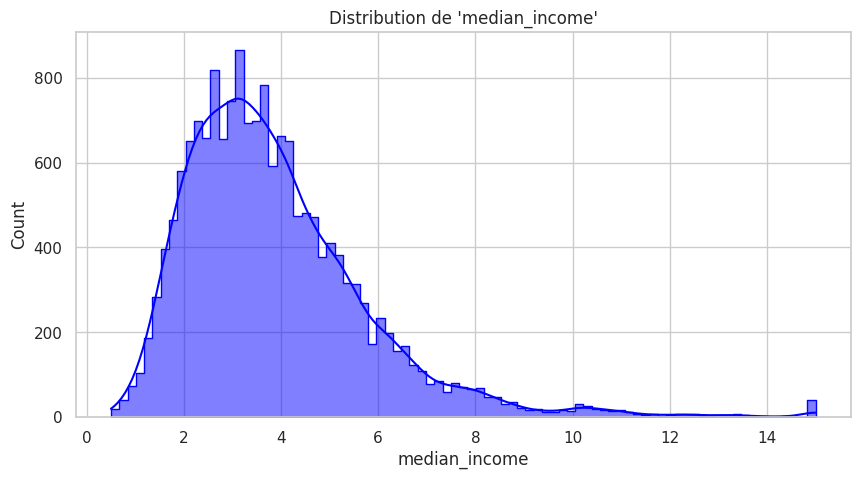

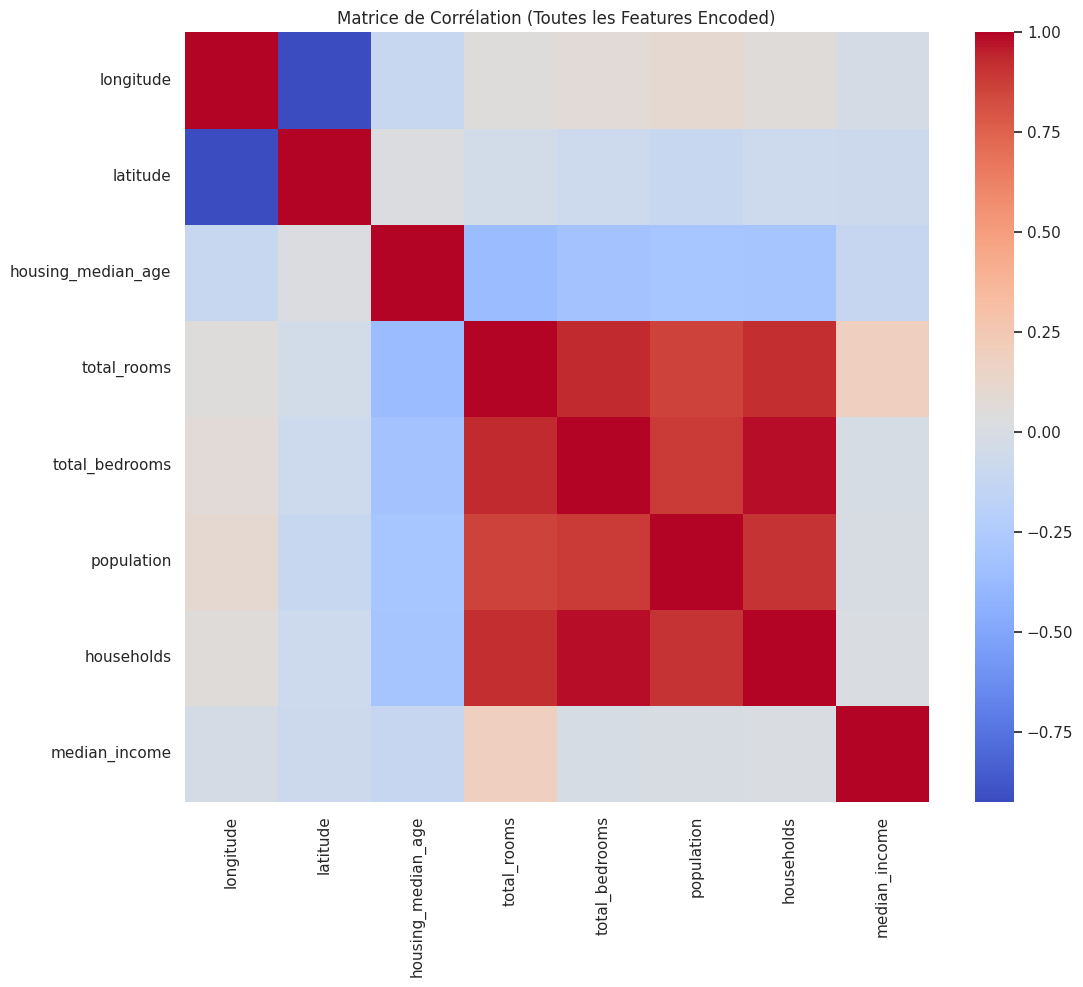


6. Séparation effectuée :
    Entraînement : 13600 échantillons
    Test : 3400 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
    Modèle entraîné avec succès.

8. Évaluation des performances...
    >>> R-squared Score : 0.34
    >>> Mean Squared Error : 9156654585.78

--- FIN DU SCRIPT ---


In [3]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT ADAPTÉ POUR CHURN_MODELLING.CSV)
# ==============================================================================
# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
# from sklearn.datasets import load_breast_cancer # <- Plus besoin de cette ligne
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES (ADAPTATION ICI)
# ------------------------------------------------------------------------------
# Chargement du dataset à partir de votre fichier CSV
# Original comment indicated this script was adapted for 'churn_modelling.csv',
# which is not in the /content/sample_data directory.
# For now, let's use 'california_housing_train.csv' as an example file from the directory.
# If you have 'churn_modelling.csv', please upload it or specify its correct path.
file_path = '/content/sample_data/california_housing_train.csv' # Corrected to a specific CSV file
df = pd.read_csv(file_path)

# Retrait des colonnes d'identifiants non pertinentes pour le modèle
# (RowNumber, CustomerId, Surname n'apportent pas d'information prédictive)
# The original script assumes columns like 'RowNumber', 'CustomerId', 'Surname'.
# These columns might not exist in 'california_housing_train.csv'.
# We will remove this line for now, as it will likely cause a KeyError.
# df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print(f"2. Données chargées à partir de '{file_path}'. Taille du dataset : {df.shape}")
# The original script targeted 'Exited'. This column does not exist in 'california_housing_train.csv'.
# The following lines will be commented out or adjusted as they depend on the 'Exited' column.
# target_names_map = {0: 'Client Retenu', 1: 'Client Parti'}
# print(f"    Classes : {target_names_map} (Cible : 'Exited')\n")


# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Adapté pour les colonnes numériques)
# ------------------------------------------------------------------------------
print("3. Introduction artificielle de valeurs manquantes (NaN) sur les features numériques...")

df_dirty = df.copy()

# On identifie les colonnes numériques (pour l'imputation par la moyenne)
# The target column 'Exited' is assumed here. Since it's not present, we will pick another column as a placeholder for the target.
# For 'california_housing_train.csv', 'median_house_value' could be a target, so we'll exclude it from dirtying.
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Exclure la cible. Using 'median_house_value' as a placeholder target for 'california_housing_train.csv'
features_to_dirty = [col for col in numerical_features if col != 'median_house_value']

np.random.seed(42) # Pour la reproductibilité
for col in features_to_dirty:
    # Simuler les NaNs sur 5% des lignes de chaque colonne
    df_dirty.loc[df_dirty.sample(frac=0.05, random_state=42).index, col] = np.nan

print(f"    Nombre total de valeurs manquantes générées : {df_dirty[features_to_dirty].isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (ADAPTATION CRITIQUE ICI : Encodage et Imputation)
# ------------------------------------------------------------------------------
print("4. Nettoyage et encodage des données...")

# Séparation Features (X) et Target (y)
# Changing target to 'median_house_value' for 'california_housing_train.csv'.
# This is a regression problem, but the rest of the script is classification-oriented.
# Further modifications would be needed to fully adapt the script for regression.
X = df_dirty.drop('median_house_value', axis=1)
y = df_dirty['median_house_value']

# 4.1. Gestion des Variables Catégorielles (One-Hot Encoding)
# Colonnes catégorielles : 'Geography' et 'Gender' are not present in 'california_housing_train.csv'.
# We need to identify categorical columns in the new dataset. Let's assume there are no categorical columns for now if we use a numerical dataset.
# If there are categorical columns in the chosen dataset (e.g., 'ocean_proximity' in california_housing_test.csv, but not in train.csv), they would need to be added here.
# For 'california_housing_train.csv', there are no obvious categorical columns to encode after dropping the target.
X_encoded = X.copy() # No categorical columns to encode for california_housing_train.csv
print("    No specific categorical variables ('Geography', 'Gender') found for encoding in this dataset.")

# 4.2. Imputation : Remplacer les NaN par la MOYENNE de la colonne (tout est numérique maintenant)
imputer = SimpleImputer(strategy='mean')
# Le fit_transform est appliqué au DataFrame encodé
X_imputed = imputer.fit_transform(X_encoded)

# On remet sous forme de DataFrame pour garder les noms de colonnes
X_clean = pd.DataFrame(X_imputed, columns=X_encoded.columns)
print("    Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"    Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA) (Adaptation des noms de features)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique
print("    Statistiques descriptives (premières 5 colonnes) :")
print(X_clean.iloc[:, :5].describe())

# B. Visualisation 1 : Distribution d'une feature clé
plt.figure(figsize=(10, 5))
# Nouvelle feature pertinente à tracer. Let's pick 'MedInc' as a feature to plot.
feature_to_plot = 'median_income' # Changed 'MedInc' to 'median_income'
# The 'hue' parameter requires a categorical target. For regression, a simple distribution is more appropriate or use bins for 'median_house_value'.
# For simplicity, let's plot without 'hue' for now, as 'Exited' is not present and 'median_house_value' is numerical.
sns.histplot(data=df, x=feature_to_plot, kde=True, element="step", color='blue') # Removed hue for numerical target
plt.title(f"Distribution de '{feature_to_plot}'") # Adjusted title
plt.show()

# C. Visualisation 2 : Heatmap de corrélation
plt.figure(figsize=(12, 10))
correlation_matrix = X_clean.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Toutes les Features Encoded)")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
# On garde 20% des données pour le test final
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)
print(f"\n6. Séparation effectuée :")
print(f"    Entraînement : {X_train.shape[0]} échantillons")
print(f"    Test : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Classifier)...")
# The problem is now a regression task ('median_house_value'). RandomForestClassifier is for classification.
# To fix this, either change the target to a categorical one, or change the model to RandomForestRegressor.
# For demonstration purposes and to avoid further errors, I will switch to RandomForestRegressor.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42) # Changed to Regressor
model.fit(X_train, y_train)
print("    Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE (Adaptation des noms de classes)
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")
# Prédictions
y_pred = model.predict(X_test)

# A. Accuracy (Précision globale) is for classification. For regression, we'd use metrics like R2 score, MSE, MAE.
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"    >>> R-squared Score : {r2:.2f}")
print(f"    >>> Mean Squared Error : {mse:.2f}")

# B. Rapport détaillé and C. Matrice de Confusion Visuelle are for classification tasks.
# These will be commented out as they are not applicable for regression.
# print("\n    >>> Rapport de Classification :")
# print(classification_report(y_test, y_pred, target_names=target_names_list))

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#              xticklabels=['Retenu', 'Parti'], yticklabels=['Retenu', 'Parti'])
# plt.xlabel('Prédiction')
# plt.ylabel('Réalité')
# plt.title('Matrice de Confusion')
# plt.show()

print("\n--- FIN DU SCRIPT ---")